In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#下面两句是解决绘图显示中文问题
plt.rcParams['font.sans-serif'] = ['SimHei'] # 替换sans-serif字体
plt.rcParams['axes.unicode_minus'] = False   # 解决坐标轴负数的负号显示问题

import string
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#数据可视化分析

In [3]:
train=pd.read_csv('E:/titanic/train.csv')
test=pd.read_csv('E:/titanic/test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.shape
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
train.shape

(891, 12)

In [39]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<function matplotlib.pyplot.show(*args, **kw)>

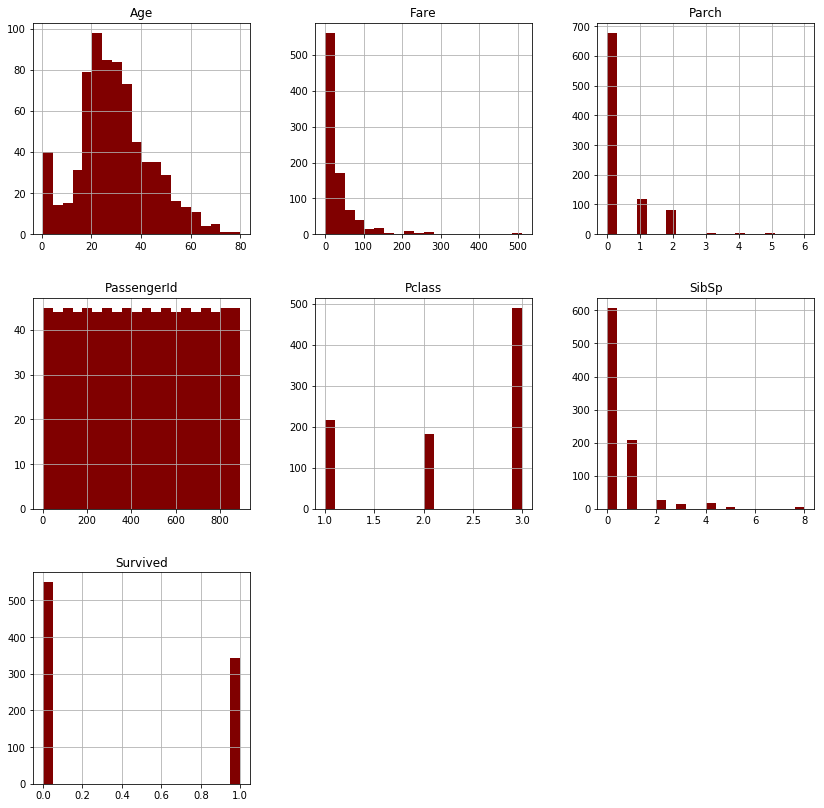

In [8]:
train.hist(figsize=(14,14),color='maroon',bins=20)#快速查看数值分布
plt.show

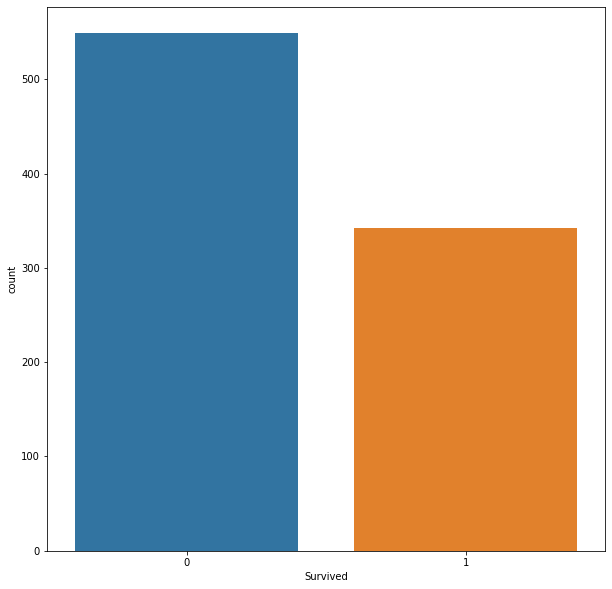

In [11]:
fig=plt.figure(figsize=(10,10))
sns.countplot(x=train['Survived'],data=train)#使用bars来表示每个分类数据的数目

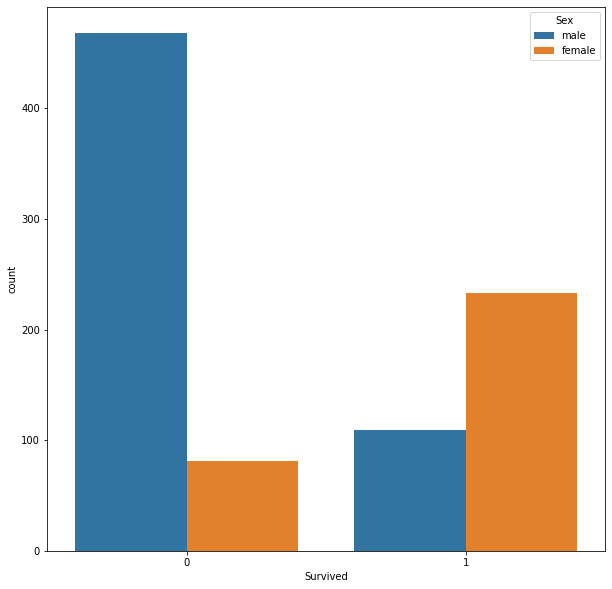

In [14]:
fig=plt.figure(figsize=(10,10))
sns.countplot(x=train['Survived'],hue=train['Sex'],data=train)
#存活下来的女性占比较多

In [37]:
print("Percentage of females who survived:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)
#train["Survived"][train["Sex"] == 'female']把survive列中女性提取
#normalize = True百分比显示
print("percentage of males who survived:",train['Survived'][train['Sex']=='male'].value_counts(normalize=True)[1]*100)

Percentage of females who survived: 74.20382165605095
percentage of males who survived: 18.890814558058924


In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


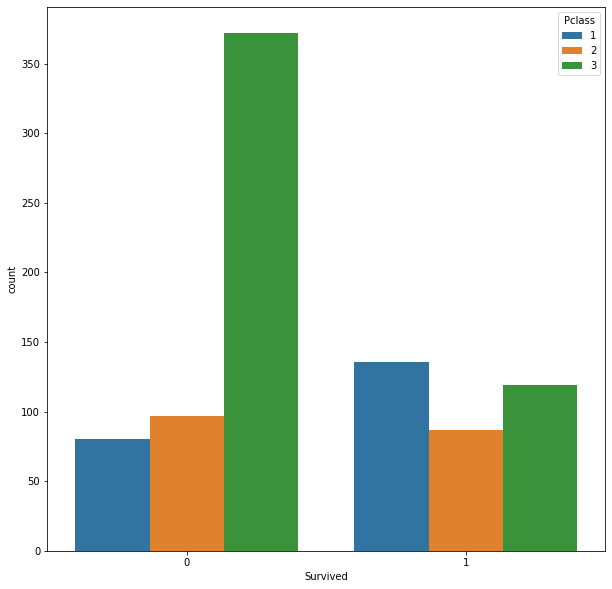

In [36]:
fig=plt.figure(figsize=(10,10))
sns.countplot(x=train['Survived'],hue=train['Pclass'],data=train)
#可以看出来虽然class3人数最多，但是存活的没有class1多

In [41]:
train[['Pclass','Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


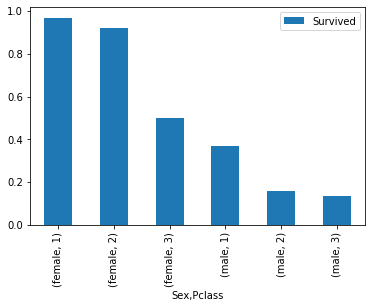

In [43]:
train[['Sex','Pclass','Survived']].groupby(['Sex','Pclass']).mean().plot.bar()

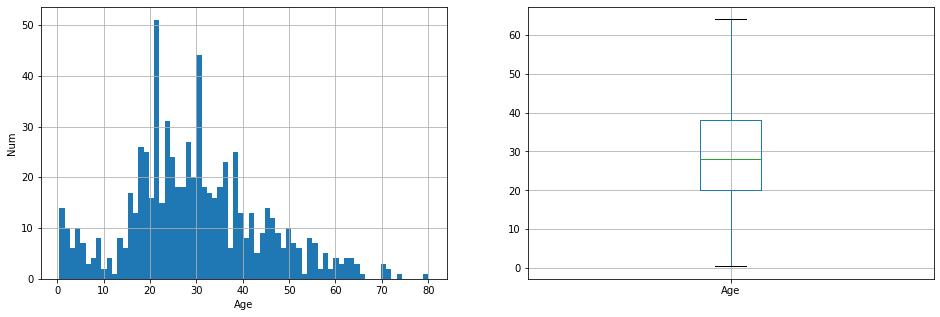

In [59]:
plt.figure(figsize=(16,5))
plt.subplot(121)#分成1*2的第一个
train['Age'].hist(bins=70)
plt.xlabel('Age')
plt.ylabel('Num')
plt.subplot(122)
train.boxplot(column='Age',showfliers=False)# showfliers是否显示异常值
plt.show()

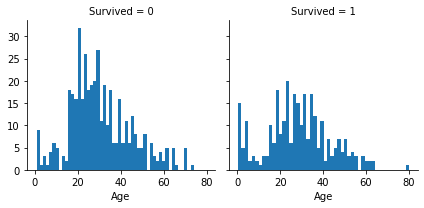

In [61]:
g=sns.FacetGrid(train,col='Survived')
g.map(plt.hist,'Age',bins=50)
plt.show()

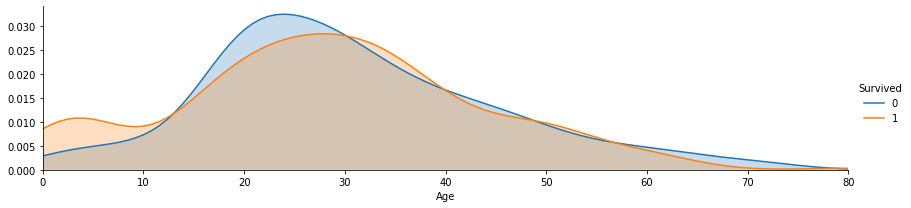

In [75]:
facet=sns.FacetGrid(train,hue='Survived',aspect=4)#aspect横纵坐标的比例
facet.map(sns.kdeplot,'Age',shade=True)#sns.kdeplot密度图
facet.set(xlim=(0,train['Age'].max()))#x轴的设置
facet.add_legend()#图标
#低龄人群的生存比例高。
#30左右的人生存和死亡比例差不多。
#20-25左右的人群死亡率更高。

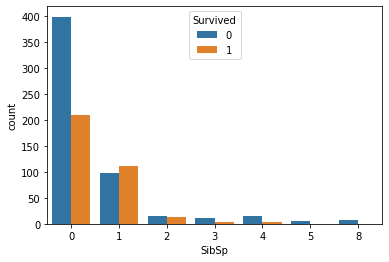

In [77]:
# 查看不同SibSp人群下死亡/生存对比
sns.countplot(x="SibSp", hue="Survived", data=train)

Text(0.5, 1.0, 'SibSp and Survived')

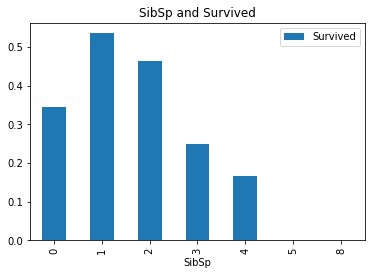

In [78]:
# 查看不同SibSp的生存平均率
train[['SibSp','Survived']].groupby(['SibSp']).mean().plot.bar().set_title('SibSp and Survived')
#SibSp为1、2的，生存比例比较高

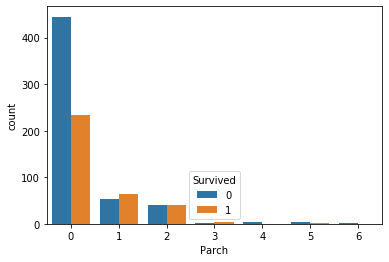

In [81]:
# 查看Parch与生存对比
sns.countplot(x='Parch',hue='Survived',data=train)

Text(0.5, 1.0, 'Parch and Survived')

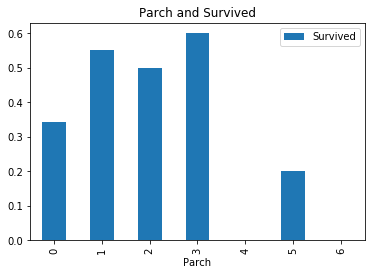

In [86]:
# 查看不同Parch下的生存比率
train[['Parch','Survived']].groupby(['Parch']).mean().plot.bar().set_title('Parch and Survived')


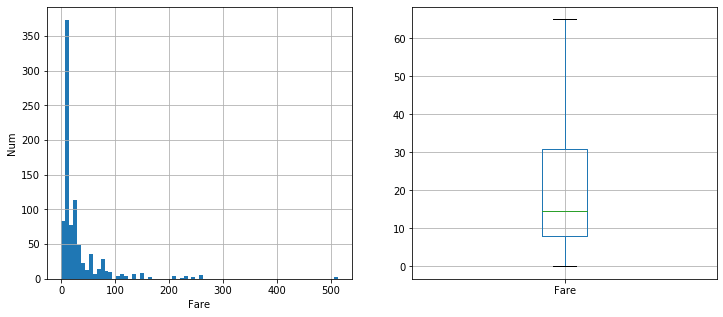

In [88]:
# 查看总体的船票花费分布
plt.figure(figsize=(12,5))
plt.subplot(121)
train['Fare'].hist(bins=70)
plt.xlabel('Fare')
plt.ylabel('Num')

plt.subplot(122)
train.boxplot(column='Fare', showfliers=False)
plt.show()

In [107]:
#对团体票处理一下
# 提取团体票的计数值，形成一个新列
#train['Group_Ticket'] = train['Fare'].groupby(by=train['Ticket']).transform('count')

# 团体票除以票价计数值，求出每张票价格
#train['Fare'] = train['Fare'] / train['Group_Ticket']

# 删除临时列
train.drop(['Group_Ticket'], axis=1, inplace=True)


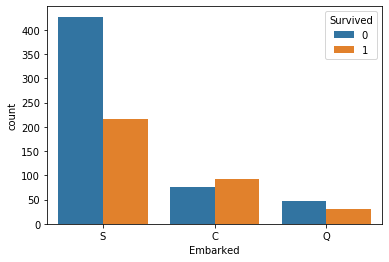

In [101]:
# Emabarked人群与生存对比
sns.countplot(x="Embarked", hue="Survived", data=train)


In [ ]:
#数据预处理

In [3]:
train=pd.read_csv('E:/titanic/train.csv')
test=pd.read_csv('E:/titanic/test.csv')
# 测试集中临时增加Survied列，并将该列数据填充为0
test['Survived'] = 0
# 把测试集数据追加到训练集后面，形成一个混合数据集。这里使用的是pandas的append方法
combined = train.append(test,sort=False)

In [4]:
combined.shape

(1309, 12)

In [5]:
train.name = 'Training Set' 
test.name = 'Test Set' 
combined.name = 'All Set'   

dfs = [train, test]

In [6]:
# 定义缺失值显示函数
def display_missing(df):    
    for col in df.columns.tolist():          
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()))
    print('\n')

# 调用函数，显示缺失值
for df in dfs:
    print('{}'.format(df.name))
    display_missing(df)
#训练集
#1）Age缺失177个
#2）Cabin缺失687个，缺失太多，不太适合先填充，除非后面
#3）Embarked缺失2个
#测试集
#1）Age缺失86个
#2）Cabin缺失327个
#3）Fare缺失1个

Training Set
PassengerId column missing values: 0
Survived column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 177
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 0
Cabin column missing values: 687
Embarked column missing values: 2


Test Set
PassengerId column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 86
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 1
Cabin column missing values: 327
Embarked column missing values: 0
Survived column missing values: 0




In [7]:
#Fare团体票处理
# 建立一个临时列，存放团体票的计数值
combined['Group_Ticket'] = combined['Fare'].groupby(by=combined['Ticket']).transform('count')

# 票价对应除以团体票计数值，得到每张票的真实价格。如果非团体票，那么就是除以1，价格不变
combined['Fare'] = combined['Fare'] / combined['Group_Ticket']

# 删除临时列
combined.drop(['Group_Ticket'], axis=1, inplace=True)

In [8]:
train_id=train['PassengerId']
test_id=test['PassengerId']

In [9]:
#相关性显示
#训练集相关性
train_corr = train.drop(['PassengerId'], axis=1).corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
train_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
#corr()相关性函数
#unstack()改变结构
train_corr.drop(train_corr.iloc[1::2].index, inplace=True)#从1开始隔两个删除eg:1，3，5，7，9
train_corr_nd = train_corr.drop(train_corr[train_corr['Correlation Coefficient'] == 1.0].index)
corr = train_corr_nd['Correlation Coefficient'] > 0.1
train_corr_nd[corr]

,Feature 1,Feature 2,Correlation Coefficient
6,Pclass,Fare,0.549500
8,Parch,SibSp,0.414838
10,Pclass,Age,0.369226
12,Survived,Pclass,0.338481
14,Age,SibSp,0.308247
16,Survived,Fare,0.257307
18,Fare,Parch,0.216225
20,Age,Parch,0.189119
22,SibSp,Fare,0.159651


In [10]:
test_corr = test.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
test_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
test_corr.drop(test_corr.iloc[1::2].index, inplace=True)
test_corr_nd = test_corr.drop(test_corr[test_corr['Correlation Coefficient'] == 1.0].index)

# 测试集数据特征间的高相关性
corr = test_corr_nd['Correlation Coefficient'] > 0.1
test_corr_nd[corr]

,Feature 1,Feature 2,Correlation Coefficient
6,Fare,Pclass,0.577147
8,Pclass,Age,0.492143
10,Fare,Age,0.337932
12,Parch,SibSp,0.306895
14,Parch,Fare,0.230046
16,Fare,SibSp,0.171539


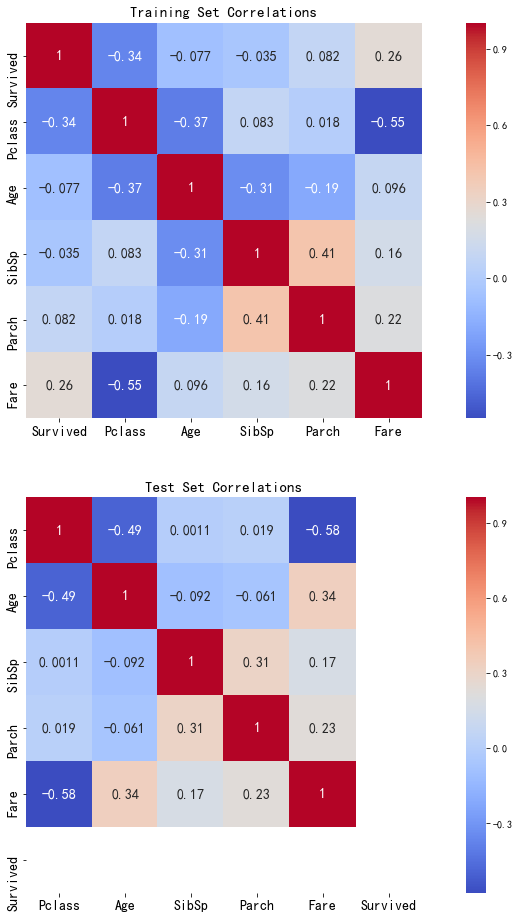

In [11]:
fig, axs = plt.subplots(2,1, figsize=(16, 16))

sns.heatmap(train.drop(['PassengerId'], axis=1).corr(), ax=axs[0], annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14}).set_ylim(6.0, 0)
sns.heatmap(test.drop(['PassengerId'], axis=1).corr(), ax=axs[1], annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14}).set_ylim(6.0, 0)
#一开始有显示不全的问题：加入.set_ylim(6.0, 0)
#annot=True，会在格子上显示数字
#If True, set the Axes aspect to “equal” so each cell will be square-shaped.
for i in range(2):    
    axs[i].tick_params(axis='x', labelsize=14)#坐标的大小
    axs[i].tick_params(axis='y', labelsize=14)
    
axs[0].set_title('Training Set Correlations', size=15)
axs[1].set_title('Test Set Correlations', size=15)

plt.show()

In [12]:
#特征数据处理
combined .info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 172.9+ KB


In [13]:
combined['Embarked'].mode()#取众数
combined['Embarked'].mode().iloc[0]#取第一行

'S'

In [14]:
if combined['Embarked'].isnull().sum() != 0:
    combined['Embarked'].fillna(combined['Embarked'].mode().iloc[0], inplace=True)

combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 172.9+ KB


In [15]:
combined.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25000,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,35.64165,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92500,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,26.55000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05000,NaN,S


In [16]:
#从名称中提取称呼
import re
# 在下面的代码中，我们通过正则提取了Title特征，正则表达式为(\w+\.)，它会在Name特征里匹配第一个以“.”号为结束的单词。同时，指定expand=False的参数会返回一个DataFrame。
# 西方姓名中间会加入称呼，比如小男童会在名字中间加入Master，女性根据年龄段及婚姻状况不同也会使用Miss 或 Mrs 等
# 这算是基于业务的理解做的衍生特征，原作者应该是考虑可以用作区分人的特征因此在此尝试清洗数据后加入

combined['Title'] = combined['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)#Series' object has no attribute 'extract'-->str
combined['Title']

0          Mr
1         Mrs
2        Miss
3         Mrs
4          Mr
5          Mr
6          Mr
7      Master
8         Mrs
9         Mrs
10       Miss
11       Miss
12         Mr
13         Mr
14       Miss
15        Mrs
16     Master
17         Mr
18        Mrs
19        Mrs
20         Mr
21         Mr
22       Miss
23         Mr
24       Miss
25        Mrs
26         Mr
27         Mr
28       Miss
29         Mr
        ...  
388        Mr
389    Master
390        Mr
391       Mrs
392    Master
393        Mr
394        Mr
395       Mrs
396        Mr
397       Mrs
398        Mr
399        Mr
400      Miss
401        Mr
402      Miss
403        Mr
404        Mr
405        Mr
406        Mr
407        Mr
408      Miss
409      Miss
410      Miss
411       Mrs
412      Miss
413        Mr
414      Dona
415        Mr
416        Mr
417    Master
Name: Title, Length: 1309, dtype: object

In [17]:
pd.crosstab(combined['Title'], combined['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,4
Countess,1,0
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2


In [18]:
combined['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Major         2
Ms            2
Mlle          2
Capt          1
Mme           1
Lady          1
Jonkheer      1
Don           1
Countess      1
Dona          1
Sir           1
Name: Title, dtype: int64

In [19]:
#将名称分类
combined['Title'].replace(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer',inplace = True)
combined['Title'].replace(['Jonkheer', 'Don', 'Sir', 'Countess', 'Dona', 'Lady'], 'Royalty',inplace =True )
combined['Title'].replace(['Mlle', 'Miss'], 'Miss',inplace =True )
combined['Title'].replace('Ms', 'Miss',inplace =True )
combined['Title'].replace(['Mme', 'Mrs'], 'Mrs',inplace =True )
combined['Title'].replace(['Mr'], 'Mr',inplace =True )
combined['Title'].replace(['Master'], 'Master',inplace =True )

In [20]:
combined['Title'].value_counts()

Mr         757
Miss       264
Mrs        198
Master      61
Officer     23
Royalty      6
Name: Title, dtype: int64

In [21]:
#印证一下包含Master的都是小童
temp = combined[combined['Title'].str.contains('Master')]
#contains函数就是检查数据中是否包含某种设定的字符，有的话返回Ttue 没有的话返回False
temp['Age'].value_counts()

2.00     5
4.00     5
1.00     5
9.00     5
6.00     4
3.00     4
7.00     3
8.00     3
13.00    3
0.83     3
11.00    2
10.00    2
11.50    1
0.75     1
14.50    1
5.00     1
12.00    1
0.33     1
0.42     1
0.92     1
0.67     1
Name: Age, dtype: int64

In [22]:
combined['Title'].str.contains('Master')

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7       True
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16      True
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
388    False
389     True
390    False
391    False
392     True
393    False
394    False
395    False
396    False
397    False
398    False
399    False
400    False
401    False
402    False
403    False
404    False
405    False
406    False
407    False
408    False
409    False
410    False
411    False
412    False
413    False
414    False
415    False
416    False
417     True
Name: Title, Length: 1309, dtype: bool

In [23]:
# 查看年龄分段后的生存率
combined[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.377049
1,Miss,0.492424
2,Mr,0.107001
3,Mrs,0.505051
4,Officer,0.217391
5,Royalty,0.500000


In [24]:
#Fare处理
combined['Fare'].isnull().sum()
combined[combined['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
152,1044,0,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Mr


In [25]:
# 按一二三等舱各自的均价来对应填充NaN
if combined['Fare'].isnull().sum() != 0:
    combined['Fare'] = combined[['Fare']].fillna(combined.groupby('Pclass').transform('mean'))

# 查看填充后的数据
combined.iloc[1043]

PassengerId                  1044
Survived                        0
Pclass                          3
Name           Storey, Mr. Thomas
Sex                          male
Age                          60.5
SibSp                           0
Parch                           0
Ticket                       3701
Fare                      7.32915
Cabin                         NaN
Embarked                        S
Title                          Mr
Name: 152, dtype: object

In [26]:
#使用qcut切分Fare
combined['Fare_Category'] = pd.qcut(combined['Fare'],13)
combined['Fare_Category']
#13，是平均分成13组
#qcut() 方法第一个参数是数据,第二个参数定义区间的分割方法,比如这里把数字分成两半,那就是 [0, 0.5, 1] 如果要分成4份,就是 [0, 0.25, 0.5, 0.75, 1] ,也可以不是均分,比如 [0, 0.1, 0.2, 0.3, 1] ,这就就会按照 1:1:1:7 进行分布,比如:

0         (7.056, 7.25]
1        (27.721, 36.3]
2          (7.88, 8.05]
3      (25.258, 27.721]
4          (7.88, 8.05]
5         (8.05, 8.712]
6      (25.258, 27.721]
7       (-0.001, 5.464]
8       (-0.001, 5.464]
9        (13.0, 25.258]
10       (5.464, 7.056]
11     (25.258, 27.721]
12         (7.88, 8.05]
13      (-0.001, 5.464]
14         (7.75, 7.88]
15       (13.0, 25.258]
16      (-0.001, 5.464]
17         (10.5, 13.0]
18        (8.712, 10.5]
19        (7.056, 7.25]
20         (10.5, 13.0]
21         (10.5, 13.0]
22         (7.88, 8.05]
23       (27.721, 36.3]
24      (-0.001, 5.464]
25      (-0.001, 5.464]
26        (7.056, 7.25]
27      (36.3, 128.082]
28         (7.75, 7.88]
29         (7.88, 8.05]
             ...       
388        (7.25, 7.75]
389     (-0.001, 5.464]
390      (13.0, 25.258]
391      (13.0, 25.258]
392      (5.464, 7.056]
393       (8.712, 10.5]
394        (7.25, 7.75]
395      (27.721, 36.3]
396       (7.056, 7.25]
397     (36.3, 128.082]
398        (7.75

In [27]:
# 合并SibSp和Parch，得到家庭成员总数
combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1
combined[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,FamilySize,Survived
3,4,0.488372
1,2,0.378723
2,3,0.371069
6,7,0.250000
0,1,0.206329
4,5,0.136364
5,6,0.120000
7,8,0.000000
8,11,0.000000


In [28]:
# 把家庭成员总数做分段处理
combined['FamilySizeCategory']=combined['FamilySize'].map(lambda x:'Single' if x<2 else 'small' if x<4 else 'middle' if x<8 else 'large')
combined['FamilySizeCategory'].value_counts()

Single    790
small     394
middle    106
large      19
Name: FamilySizeCategory, dtype: int64

In [29]:
#Age处理
#对Name中包含Master的乘客年龄单独处理
#求出Age为非空，同时Name中包含的Master的乘客年龄均值
ZZ = combined[combined['Age'].notnull() & combined['Title'].str.contains('Master')]['Age'].mean()
ZZ

5.482641509433963

In [30]:
combined[combined['Age'].isnull()  & combined['Title'].str.contains('Master')]
combined.loc[65,'Age'] = ZZ
combined.loc[159,'Age'] = ZZ
combined.loc[176,'Age'] = ZZ
combined.loc[709,'Age'] = ZZ
combined.loc[244,'Age'] = ZZ
combined.loc[339,'Age'] = ZZ
combined.loc[344,'Age'] = ZZ
combined.loc[417,'Age'] = ZZ
combined[combined['Age'].isnull()  & combined['Title'].str.contains('Master')]



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fare_Category,FamilySize,FamilySizeCategory


In [31]:
#使用混合预测模型预测Age
#在这里使用了GradientBoostingRegressor、 RandomForestRegressor方法，本身可能也会引入预测误差，而且预测模型随着参数设定的不同，预测误差 会很大，未必就比简单里办法更好

missing_age_df = pd.DataFrame(combined[['Pclass', 'Name', 'Sex', 'Age', 'FamilySize', 'FamilySizeCategory','Fare','Embarked', 'Title']])
missing_age_df = pd.get_dummies(missing_age_df,columns=[ 'Name', 'Sex','Embarked','FamilySizeCategory','Title'])

# 注意，这里没有对数值型数据做标准化处理
missing_age_train = missing_age_df[missing_age_df['Age'].notnull()]
missing_age_test = missing_age_df[missing_age_df['Age'].isnull()]

In [35]:
from sklearn import ensemble#集成学习（ensemble learning）的学习方式
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

from sklearn import ensemble
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor


from sklearn.preprocessing import StandardScaler

def fill_missing_age(missing_age_train, missing_age_test):
    missing_age_X_train = missing_age_train.drop(['Age'], axis=1)
    missing_age_Y_train = missing_age_train['Age']
    missing_age_X_test = missing_age_test.drop(['Age'], axis=1)

    # 这里对训练数据做了标准化处理，原作者没有做，我做的也不一定就对
    missing_age_X_train = StandardScaler().fit_transform(missing_age_X_train)
    missing_age_X_test = StandardScaler().fit_transform(missing_age_X_test)
    
    # GBM模型预测
    gbm_reg = GradientBoostingRegressor(random_state=42)
    gbm_reg_param_grid = {'n_estimators': [2000], 'max_depth': [4], 'learning_rate': [0.01], 'max_features': [3]}
    #n_jobs: 并行数，int：个数,-1：跟CPU核数一致, 1:默认值
    #cv交叉验证参数，默认None，使用三折交叉验证。指定fold数量，默认为3，也可以是yield训练/测试数据的生成器
    #verbose：日志冗长度，int：冗长度，0：不输出训练过程，1：偶尔输出，>1：对每个子模型都输出。
    #scoring：模型评价标准（均方误差）
    gbm_reg_grid = model_selection.GridSearchCV(gbm_reg, gbm_reg_param_grid, cv=10, n_jobs=25, verbose=1, scoring='neg_mean_squared_error')
    gbm_reg_grid.fit(missing_age_X_train, missing_age_Y_train)
    print('Age feature Best GB Params:' + str(gbm_reg_grid.best_params_))
    print('Age feature Best GB Score:' + str(gbm_reg_grid.best_score_))
    print('GB Train Error for "Age" Feature Regressor:' + str(gbm_reg_grid.score(missing_age_X_train, missing_age_Y_train)))
    missing_age_test.loc[:, 'Age_GB'] = gbm_reg_grid.predict(missing_age_X_test)
    print(missing_age_test['Age_GB'][:4])
    
    # 随机森林模型预测
    rf_reg = RandomForestRegressor()
    rf_reg_param_grid = {'n_estimators': [200], 'max_depth': [5], 'random_state': [0]}
    rf_reg_grid = model_selection.GridSearchCV(rf_reg, rf_reg_param_grid, cv=10, n_jobs=25, verbose=1, scoring='neg_mean_squared_error')
    rf_reg_grid.fit(missing_age_X_train, missing_age_Y_train)
    print('Age feature Best RF Params:' + str(rf_reg_grid.best_params_))
    print('Age feature Best RF Score:' + str(rf_reg_grid.best_score_))
    print('RF Train Error for "Age" Feature Regressor' + str(rf_reg_grid.score(missing_age_X_train, missing_age_Y_train)))
    missing_age_test.loc[:, 'Age_RF'] = rf_reg_grid.predict(missing_age_X_test)
    print(missing_age_test['Age_RF'][:4])

    # 模型预测结果合并
    print('shape1', missing_age_test['Age'].shape, missing_age_test[['Age_GB', 'Age_RF']].mode(axis=1).shape)
    # missing_age_test['Age'] = missing_age_test[['Age_GB', 'Age_LR']].mode(axis=1)

    missing_age_test.loc[:, 'Age'] = np.mean([missing_age_test['Age_GB'], missing_age_test['Age_RF']])
    print(missing_age_test['Age'][:4])

    #做了标准化以后，数据会变成np.array格式，这里再做一次转换
    missing_age_test = pd.DataFrame(missing_age_test)
    missing_age_test.drop(['Age_GB', 'Age_RF'], axis=1, inplace=True)

    return missing_age_test

In [33]:
combined.loc[(combined.Age.isnull()), 'Age'] = fill_missing_age(missing_age_train, missing_age_test)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   5 out of  10 | elapsed:    8.1s remaining:    8.1s
[Parallel(n_jobs=25)]: Done  10 out of  10 | elapsed:    9.7s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Age feature Best GB Params:{'learning_rate': 0.01, 'max_depth': 4, 'max_features': 3, 'n_estimators': 2000}
Age feature Best GB Score:-178.85818014358497
GB Train Error for "Age" Feature Regressor:-134.94815361128823
5     29.794554
17    31.821978
19    30.253198
26    30.115109
Name: Age_GB, dtype: float64
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   5 out of  10 | elapsed:   11.7s remaining:   11.7s
[Parallel(n_jobs=25)]: Done  10 out of  10 | elapsed:   14.3s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Age feature Best RF Params:{'max_depth': 5, 'n_estimators': 200, 'random_state': 0}
Age feature Best RF Score:-120.46383760323916
RF Train Error for "Age" Feature Regressor-102.65753643985873
5     29.008145
17    37.323244
19    29.173391
26    28.952381
Name: Age_RF, dtype: float64
shape1 (254,) (254, 2)
5     29.55937
17    29.55937
19    29.55937
26    29.55937
Name: Age, dtype: float64


In [36]:
combined['Age_group'] = combined['Age'].map(lambda x: 'child' if x<12 else 'youth' if x<18 else 'adult' if x<30 else 'middle' if x<50 else 'old' if x<70 else 'too old' if x>=70 else 'null')

by_age = combined.groupby('Age_group')['Survived'].mean()

by_age

Age_group
adult      0.216216
child      0.396226
middle     0.293956
old        0.254902
too old    0.125000
youth      0.349206
Name: Survived, dtype: float64

In [37]:
combined[['Pclass', 'Name', 'Sex', 'Age', 'FamilySize', 'FamilySizeCategory','Fare','Embarked', 'Title']]

,Pclass,Name,Sex,Age,FamilySize,FamilySizeCategory,Fare,Embarked,Title
0,3,"Braund, Mr. Owen Harris",male,22.000000,2,small,7.250000,S,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,2,small,35.641650,C,Mrs
2,3,"Heikkinen, Miss. Laina",female,26.000000,1,Single,7.925000,S,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,2,small,26.550000,S,Mrs
4,3,"Allen, Mr. William Henry",male,35.000000,1,Single,8.050000,S,Mr
5,3,"Moran, Mr. James",male,29.559370,1,Single,8.458300,Q,Mr
6,1,"McCarthy, Mr. Timothy J",male,54.000000,1,Single,25.931250,S,Mr
7,3,"Palsson, Master. Gosta Leonard",male,2.000000,5,middle,4.215000,S,Master
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,3,small,3.711100,S,Mrs
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,2,small,15.035400,C,Mrs


Cabin处理（还没有搞明白）


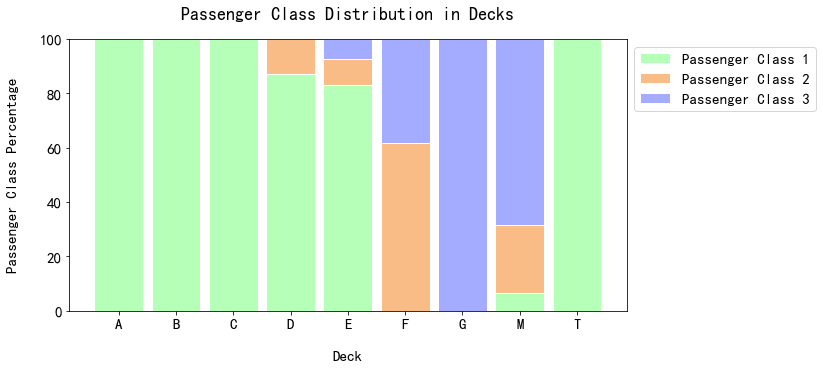

In [38]:
# 创建Deck列，根据Cabin列的第一个字母（M表示missing）
# Creating Deck column from the first letter of the Cabin column (M stands for Missing)
combined['Deck'] = combined['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')

combined_decks = combined.groupby(['Deck', 'Pclass']).count().drop(columns=['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 
                                                                        'Fare', 'Embarked', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name': 'Count'}).transpose()

def get_pclass_dist(df):
    
    # Creating a dictionary for every passenger class count in every deck
    deck_counts = {'A': {}, 'B': {}, 'C': {}, 'D': {}, 'E': {}, 'F': {}, 'G': {}, 'M': {}, 'T': {}}
    decks = df.columns.levels[0]    
    
    for deck in decks:
        for pclass in range(1, 4):
            try:
                count = df[deck][pclass][0]
                deck_counts[deck][pclass] = count 
            except KeyError:
                deck_counts[deck][pclass] = 0
                
    df_decks = pd.DataFrame(deck_counts)    
    deck_percentages = {}

    # Creating a dictionary for every passenger class percentage in every deck
    for col in df_decks.columns:
        deck_percentages[col] = [(count / df_decks[col].sum()) * 100 for count in df_decks[col]]
        
    return deck_counts, deck_percentages

def display_pclass_dist(percentages):
    
    df_percentages = pd.DataFrame(percentages).transpose()
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M', 'T')
    bar_count = np.arange(len(deck_names))  
    bar_width = 0.85
    
    pclass1 = df_percentages[0]
    pclass2 = df_percentages[1]
    pclass3 = df_percentages[2]
    
    plt.figure(figsize=(10, 5))
    plt.bar(bar_count, pclass1, color='#b5ffb9', edgecolor='white', width=bar_width, label='Passenger Class 1')
    plt.bar(bar_count, pclass2, bottom=pclass1, color='#f9bc86', edgecolor='white', width=bar_width, label='Passenger Class 2')
    plt.bar(bar_count, pclass3, bottom=pclass1 + pclass2, color='#a3acff', edgecolor='white', width=bar_width, label='Passenger Class 3')

    plt.xlabel('Deck', size=15, labelpad=20)
    plt.ylabel('Passenger Class Percentage', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)    
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Passenger Class Distribution in Decks', size=18, y=1.05)   
    
    plt.show()    

all_deck_count, all_deck_per = get_pclass_dist(combined_decks)
display_pclass_dist(all_deck_per)

In [39]:
# 把T甲板的乘客改到A甲板
# Passenger in the T deck is changed to A
idx = combined[combined['Deck'] == 'T'].index
combined.loc[idx, 'Deck'] = 'A'
#似乎是把没有Cabin号的归为一类
#其他的乘客 按照Cabin号确定甲板位置
#没明白

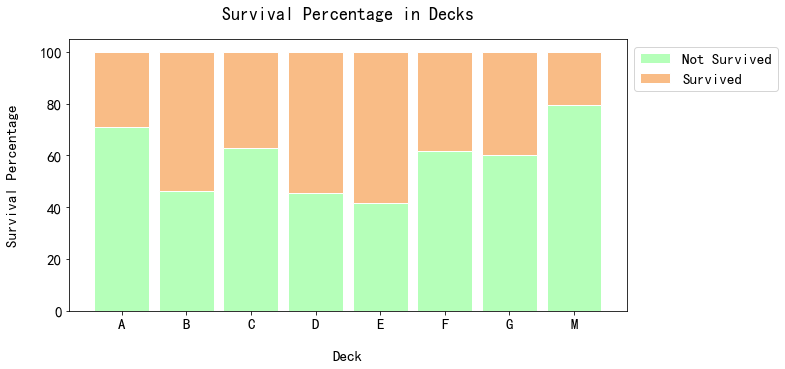

In [40]:
combined_decks_survived = combined.groupby(['Deck', 'Survived']).count().drop(columns=['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 
                                                                                   'Embarked', 'Pclass', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name':'Count'}).transpose()

def get_survived_dist(df):
    
    # Creating a dictionary for every survival count in every deck
    surv_counts = {'A':{}, 'B':{}, 'C':{}, 'D':{}, 'E':{}, 'F':{}, 'G':{}, 'M':{}}
    decks = df.columns.levels[0]    

    for deck in decks:
        for survive in range(0, 2):
            surv_counts[deck][survive] = df[deck][survive][0]
            
    df_surv = pd.DataFrame(surv_counts)
    surv_percentages = {}

    for col in df_surv.columns:
        surv_percentages[col] = [(count / df_surv[col].sum()) * 100 for count in df_surv[col]]
        
    return surv_counts, surv_percentages

def display_surv_dist(percentages):
    
    df_survived_percentages = pd.DataFrame(percentages).transpose()
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M')
    bar_count = np.arange(len(deck_names))  
    bar_width = 0.85    

    not_survived = df_survived_percentages[0]
    survived = df_survived_percentages[1]
    
    plt.figure(figsize=(10, 5))
    plt.bar(bar_count, not_survived, color='#b5ffb9', edgecolor='white', width=bar_width, label="Not Survived")
    plt.bar(bar_count, survived, bottom=not_survived, color='#f9bc86', edgecolor='white', width=bar_width, label="Survived")
 
    plt.xlabel('Deck', size=15, labelpad=20)
    plt.ylabel('Survival Percentage', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)    
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Survival Percentage in Decks', size=18, y=1.05)
    
    plt.show()

all_surv_count, all_surv_per = get_survived_dist(combined_decks_survived)
display_surv_dist(all_surv_per)

In [41]:
combined['Deck'] = combined['Deck'].replace(['A', 'B', 'C'], 'ABC')
combined['Deck'] = combined['Deck'].replace(['D', 'E'], 'DE')
combined['Deck'] = combined['Deck'].replace(['F', 'G'], 'FG')

combined['Deck'].value_counts()

M      1013
ABC     183
DE       87
FG       26
Name: Deck, dtype: int64

 Family和Tiket处理（借鉴学习）

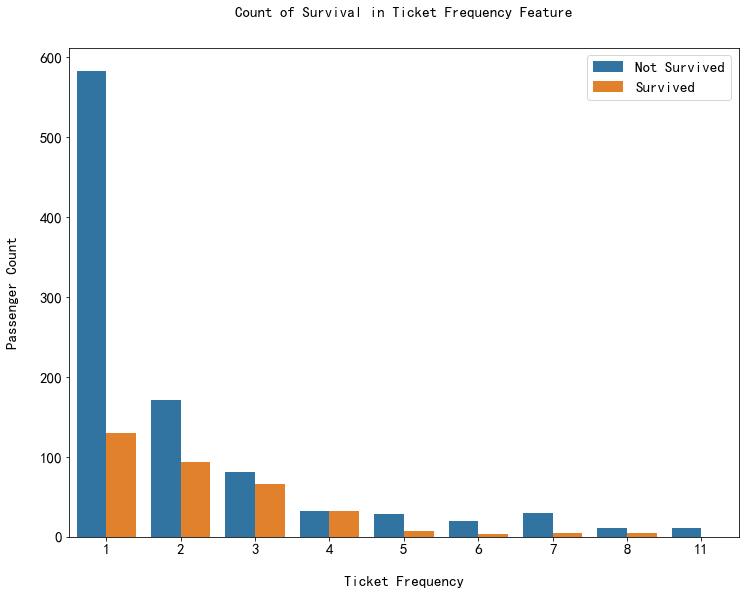

In [42]:
combined['Ticket_Frequency'] = combined.groupby('Ticket')['Ticket'].transform('count')

fig, axs = plt.subplots(figsize=(12, 9))
sns.countplot(x='Ticket_Frequency', hue='Survived', data=combined)

plt.xlabel('Ticket Frequency', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Ticket Frequency'), size=15, y=1.05)

plt.show()

In [43]:
def extract_surname(data):    
    
    families = []
    
    for i in range(len(data)):        
        name = data.iloc[i]

        if '(' in name:
            name_no_bracket = name.split('(')[0] 
        else:
            name_no_bracket = name
            
        family = name_no_bracket.split(',')[0]
        title = name_no_bracket.split(',')[1].strip().split(' ')[0]
        
        for c in string.punctuation:
            family = family.replace(c, '').strip()
            
        families.append(family)
            
    return families

combined['Family'] = extract_surname(combined['Name'])

In [44]:
train = combined.loc[:890]
test = combined[891:]
dfs = [train, test]

In [46]:
#创建一个同时存在于训练集合测试集的家庭和Ticket列表
non_unique_families = [x for x in train['Family'].unique() if x in test['Family'].unique()]
non_unique_tickets = [x for x in train['Ticket'].unique() if x in test['Ticket'].unique()]

df_family_survival_rate = train.groupby('Family')['Survived', 'Family','FamilySize'].median()
df_ticket_survival_rate = train.groupby('Ticket')['Survived', 'Ticket','Ticket_Frequency'].median()

family_rates = {}
ticket_rates = {}

for i in range(len(df_family_survival_rate)):
    # Checking a family exists in both training and test set, and has members more than 1
    if df_family_survival_rate.index[i] in non_unique_families and df_family_survival_rate.iloc[i, 1] > 1:
        family_rates[df_family_survival_rate.index[i]] = df_family_survival_rate.iloc[i, 0]

for i in range(len(df_ticket_survival_rate)):
    # Checking a ticket exists in both training and test set, and has members more than 1
    if df_ticket_survival_rate.index[i] in non_unique_tickets and df_ticket_survival_rate.iloc[i, 1] > 1:
        ticket_rates[df_ticket_survival_rate.index[i]] = df_ticket_survival_rate.iloc[i, 0]

In [47]:
#考虑家庭生存率
mean_survival_rate = np.mean(train['Survived'])

train_family_survival_rate = []
train_family_survival_rate_NA = []
test_family_survival_rate = []
test_family_survival_rate_NA = []

for i in range(len(train)):
    if train['Family'][i] in family_rates:
        train_family_survival_rate.append(family_rates[train['Family'][i]])
        train_family_survival_rate_NA.append(1)
    else:
        train_family_survival_rate.append(mean_survival_rate)
        train_family_survival_rate_NA.append(0)
        
for i in range(len(test)):
    if test['Family'].iloc[i] in family_rates:
        test_family_survival_rate.append(family_rates[test['Family'].iloc[i]])
        test_family_survival_rate_NA.append(1)
    else:
        test_family_survival_rate.append(mean_survival_rate)
        test_family_survival_rate_NA.append(0)
        
train['Family_Survival_Rate'] = train_family_survival_rate
train['Family_Survival_Rate_NA'] = train_family_survival_rate_NA
test['Family_Survival_Rate'] = test_family_survival_rate
test['Family_Survival_Rate_NA'] = test_family_survival_rate_NA

train_ticket_survival_rate = []
train_ticket_survival_rate_NA = []
test_ticket_survival_rate = []
test_ticket_survival_rate_NA = []

for i in range(len(train)):
    if train['Ticket'][i] in ticket_rates:
        train_ticket_survival_rate.append(ticket_rates[train['Ticket'][i]])
        train_ticket_survival_rate_NA.append(1)
    else:
        train_ticket_survival_rate.append(mean_survival_rate)
        train_ticket_survival_rate_NA.append(0)
        
for i in range(len(test)):
    if test['Ticket'].iloc[i] in ticket_rates:
        test_ticket_survival_rate.append(ticket_rates[test['Ticket'].iloc[i]])
        test_ticket_survival_rate_NA.append(1)
    else:
        test_ticket_survival_rate.append(mean_survival_rate)
        test_ticket_survival_rate_NA.append(0)
        
train['Ticket_Survival_Rate'] = train_ticket_survival_rate
train['Ticket_Survival_Rate_NA'] = train_ticket_survival_rate_NA
test['Ticket_Survival_Rate'] = test_ticket_survival_rate
test['Ticket_Survival_Rate_NA'] = test_ticket_survival_rate_NA

In [48]:
#把基于家庭计算的生存率和基于Tiket计算的生存率做个平均
for df in [train, test]:
    df['Survival_Rate'] = (df['Ticket_Survival_Rate'] + df['Family_Survival_Rate']) / 2
    df['Survival_Rate_NA'] = (df['Ticket_Survival_Rate_NA'] + df['Family_Survival_Rate_NA']) / 2  

In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 26 columns):
PassengerId                891 non-null int64
Survived                   891 non-null int64
Pclass                     891 non-null int64
Name                       891 non-null object
Sex                        891 non-null object
Age                        891 non-null float64
SibSp                      891 non-null int64
Parch                      891 non-null int64
Ticket                     891 non-null object
Fare                       891 non-null float64
Cabin                      204 non-null object
Embarked                   891 non-null object
Title                      891 non-null object
Fare_Category              891 non-null category
FamilySize                 891 non-null int64
FamilySizeCategory         891 non-null object
Age_group                  891 non-null object
Deck                       891 non-null object
Ticket_Frequency           891 non-null int64
Famil

特征工程

In [51]:
train_data = train
test_data =test
train_data.to_csv('E:/titanic/train_data.csv',index= False)
test_data.to_csv('E:/titanic/test_data.csv',index= False)

In [60]:
train = pd.read_csv('E:/titanic/train_data.csv')
test = pd.read_csv('E:/titanic/test_data.csv')
# 将训练数据分成标记和特征两部分

# 提取出训练集数据标记
y_train = train['Survived']

# 删除明确不需要的列
X_train = train.drop(['PassengerId', 'Survived','Name','Age','Ticket','Fare', 'Cabin','Family','Ticket_Survival_Rate', 'Family_Survival_Rate', 'Ticket_Survival_Rate_NA', 'Family_Survival_Rate_NA'],axis=1)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
Pclass                891 non-null int64
Sex                   891 non-null object
SibSp                 891 non-null int64
Parch                 891 non-null int64
Embarked              891 non-null object
Title                 891 non-null object
Fare_Category         891 non-null object
FamilySize            891 non-null int64
FamilySizeCategory    891 non-null object
Age_group             891 non-null object
Deck                  891 non-null object
Ticket_Frequency      891 non-null int64
Survival_Rate         891 non-null float64
Survival_Rate_NA      891 non-null float64
dtypes: float64(2), int64(5), object(7)
memory usage: 97.5+ KB


In [61]:
ID=test['PassengerId']
# 删除明确不需要的列
X_test = test.drop(['PassengerId', 'Survived','Name','Age','Ticket','Fare', 'Cabin','Family','Ticket_Survival_Rate', 'Family_Survival_Rate', 'Ticket_Survival_Rate_NA', 'Family_Survival_Rate_NA'],axis=1)

X_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
Pclass                418 non-null int64
Sex                   418 non-null object
SibSp                 418 non-null int64
Parch                 418 non-null int64
Embarked              418 non-null object
Title                 418 non-null object
Fare_Category         418 non-null object
FamilySize            418 non-null int64
FamilySizeCategory    418 non-null object
Age_group             418 non-null object
Deck                  418 non-null object
Ticket_Frequency      418 non-null int64
Survival_Rate         418 non-null float64
Survival_Rate_NA      418 non-null float64
dtypes: float64(2), int64(5), object(7)
memory usage: 45.8+ KB


In [57]:
X_train.head()

,Pclass,Sex,SibSp,Parch,Embarked,Title,Fare_Category,FamilySize,FamilySizeCategory,Age_group,Deck,Ticket_Frequency,Survival_Rate,Survival_Rate_NA
0,3,male,1,0,S,Mr,"(7.056, 7.25]",2,small,adult,M,1,0.383838,0.0
1,1,female,1,0,C,Mrs,"(27.721, 36.3]",2,small,middle,ABC,2,1.000000,1.0
2,3,female,0,0,S,Miss,"(7.88, 8.05]",1,Single,adult,M,1,0.383838,0.0
3,1,female,1,0,S,Mrs,"(25.258, 27.721]",2,small,middle,ABC,2,0.383838,0.0
4,3,male,0,0,S,Mr,"(7.88, 8.05]",1,Single,middle,M,1,0.383838,0.0


In [63]:
X_train.head()

,Pclass,Sex,SibSp,Parch,Embarked,Title,Fare_Category,FamilySize,FamilySizeCategory,Age_group,...,Survival_Rate_0.25,Survival_Rate_0.3838383838383838,Survival_Rate_0.4419191919191919,Survival_Rate_0.5,Survival_Rate_0.6919191919191919,Survival_Rate_0.75,Survival_Rate_1.0,Survival_Rate_NA_0.0,Survival_Rate_NA_0.5,Survival_Rate_NA_1.0
0,3,male,1,0,S,Mr,"(7.056, 7.25]",2,small,adult,...,0,1,0,0,0,0,0,1,0,0
1,1,female,1,0,C,Mrs,"(27.721, 36.3]",2,small,middle,...,0,0,0,0,0,0,1,0,0,1
2,3,female,0,0,S,Miss,"(7.88, 8.05]",1,Single,adult,...,0,1,0,0,0,0,0,1,0,0
3,1,female,1,0,S,Mrs,"(25.258, 27.721]",2,small,middle,...,0,1,0,0,0,0,0,1,0,0
4,3,male,0,0,S,Mr,"(7.88, 8.05]",1,Single,middle,...,0,1,0,0,0,0,0,1,0,0


In [62]:
# 对数值型的列做二值化分列处理，非数值的get_dummies会自动分列处理

# 对数值列Pclass做二值化分列处理
X_train = X_train.join(pd.get_dummies(X_train.Pclass, prefix= 'Pclass'))

# 对数值列SibSp做二值化分列处理
X_train = X_train.join(pd.get_dummies(X_train.SibSp, prefix= 'SibSp'))

# 对数值列Parch做二值化分列处理
X_train = X_train.join(pd.get_dummies(X_train.Parch, prefix= 'Parch'))

# 因为测试集里面Parch多了一个数，训练集里面没有，如果不做补充，训练集和测试集维度会不一样
X_train['Parch_9'] = 0

# 对数值列FamilySize做二值化分列处理
X_train = X_train.join(pd.get_dummies(X_train.FamilySize, prefix= 'FamilySize'))

# 对数值列Ticket_Frequency做二值化分列处理
X_train = X_train.join(pd.get_dummies(X_train.Ticket_Frequency, prefix= 'Ticket_Frequency'))

# 对数值列Survival_Rate做二值化分列处理
X_train = X_train.join(pd.get_dummies(X_train.Survival_Rate, prefix= 'Survival_Rate'))

# 对数值列Survival_Rate_NA做二值化分列处理
X_train = X_train.join(pd.get_dummies(X_train.Survival_Rate_NA, prefix= 'Survival_Rate_NA'))

In [64]:
# 删除7个数值列
X_train = X_train.drop(['Pclass','SibSp','Parch','FamilySize','Ticket_Frequency','Survival_Rate','Survival_Rate_NA'],axis=1)

In [65]:
#特征统一做One-Hot编码
X_train = pd.get_dummies(X_train)
encoded = list(X_train.columns)
print ("{} total features after one-hot encoding.".format(len(encoded)))

X_train.info()

86 total features after one-hot encoding.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 86 columns):
Pclass_1                            891 non-null uint8
Pclass_2                            891 non-null uint8
Pclass_3                            891 non-null uint8
SibSp_0                             891 non-null uint8
SibSp_1                             891 non-null uint8
SibSp_2                             891 non-null uint8
SibSp_3                             891 non-null uint8
SibSp_4                             891 non-null uint8
SibSp_5                             891 non-null uint8
SibSp_8                             891 non-null uint8
Parch_0                             891 non-null uint8
Parch_1                             891 non-null uint8
Parch_2                             891 non-null uint8
Parch_3                             891 non-null uint8
Parch_4                             891 non-null uint8
Parch_5                     

In [69]:
X_test=X_test.join(pd.get_dummies(X_test.Pclass,prefix='Pclass'))#prefix:column上加前缀
# 对数值列SibSp做二值化分列处理
X_test = X_test.join(pd.get_dummies(X_test.SibSp, prefix= 'SibSp'))

# 对数值列Parch做二值化分列处理
X_test= X_test.join(pd.get_dummies(X_test.Parch, prefix= 'Parch'))

# 对数值列FamilySize做二值化分列处理
X_test =X_test.join(pd.get_dummies(X_test.FamilySize, prefix= 'FamilySize'))

# 对数值列Ticket_Frequency做二值化分列处理
X_test = X_test.join(pd.get_dummies(X_test.Ticket_Frequency, prefix= 'Ticket_Frequency'))

# 对数值列Survival_Rate做二值化分列处理
X_test = X_test.join(pd.get_dummies(X_test.Survival_Rate, prefix= 'Survival_Rate'))

# 对数值列Survival_Rate_NA做二值化分列处理
X_test = X_test.join(pd.get_dummies(X_test.Survival_Rate_NA, prefix= 'Survival_Rate_NA'))

In [71]:
X_test = X_test.drop(['Pclass','SibSp','Parch','FamilySize','Ticket_Frequency','Survival_Rate','Survival_Rate_NA'],axis=1)

In [76]:
X_test=pd.get_dummies(X_test)
encoded = list(X_test.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))
X_test.info()

86 total features after one-hot encoding.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 86 columns):
Pclass_1                            418 non-null uint8
Pclass_2                            418 non-null uint8
Pclass_3                            418 non-null uint8
SibSp_0                             418 non-null uint8
SibSp_1                             418 non-null uint8
SibSp_2                             418 non-null uint8
SibSp_3                             418 non-null uint8
SibSp_4                             418 non-null uint8
SibSp_5                             418 non-null uint8
SibSp_8                             418 non-null uint8
Parch_0                             418 non-null uint8
Parch_1                             418 non-null uint8
Parch_2                             418 non-null uint8
Parch_3                             418 non-null uint8
Parch_4                             418 non-null uint8
Parch_5                     

In [79]:
#特征筛选
#特征筛选是通过几个机器学习模型，筛选出对结果影响最大的特征
#然后将最重要的特征合并起来为后面机器学习和预测使用
from time import time
from sklearn import ensemble
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import ExtraTreesClassifier


from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron

from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


from sklearn.preprocessing import LabelEncoder

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score,roc_auc_score

In [80]:
def get_top_n_features(X_train, y_train, top_n_features):
    # 随机森林
    rf_est = RandomForestClassifier(random_state=42)
    rf_param_grid = {'n_estimators': [500], 'min_samples_split': [2, 3], 'max_depth': [20]}
    rf_grid = model_selection.GridSearchCV(rf_est, rf_param_grid, n_jobs=25, cv=10, verbose=1)   #这里使用了网格搜索
    rf_grid.fit(X_train,y_train)
    #将feature按Importance排序
    feature_imp_sorted_rf = pd.DataFrame({'feature': list(X_train), 'importance': rf_grid.best_estimator_.feature_importances_}).sort_values('importance', ascending=False)
    features_top_n_rf = feature_imp_sorted_rf.head(top_n_features)['feature']
    print('Sample 25 Features from RF Classifier')
    print(str(features_top_n_rf[:25]))

    # AdaBoost
    ada_est = ensemble.AdaBoostClassifier(random_state=42)
    ada_param_grid = {'n_estimators': [500], 'learning_rate': [0.5, 0.6]}
    ada_grid = model_selection.GridSearchCV(ada_est, ada_param_grid, n_jobs=25, cv=10, verbose=1)
    ada_grid.fit(X_train, y_train)
    #排序
    feature_imp_sorted_ada = pd.DataFrame({'feature': list(X_train),'importance': ada_grid.best_estimator_.feature_importances_}).sort_values( 'importance', ascending=False)
    features_top_n_ada = feature_imp_sorted_ada.head(top_n_features)['feature']
    print('Sample 25 Features from Ada Classifier')
    print(str(features_top_n_ada[:25]))

    # ExtraTree
    et_est = ensemble.ExtraTreesClassifier(random_state=42)
    et_param_grid = {'n_estimators': [500], 'min_samples_split': [3, 4], 'max_depth': [15]}
    et_grid = model_selection.GridSearchCV(et_est, et_param_grid, n_jobs=25, cv=10, verbose=1)
    et_grid.fit(X_train, y_train)
    #排序
    feature_imp_sorted_et = pd.DataFrame({'feature': list(X_train), 'importance': et_grid.best_estimator_.feature_importances_}).sort_values('importance', ascending=False)
    features_top_n_et = feature_imp_sorted_et.head(top_n_features)['feature']
    print('Sample 25 Features from ET Classifier:')
    print(str(features_top_n_et[:25]))

    # 将三个模型挑选出来的前features_top_n_et合并
    features_top_n = pd.concat([features_top_n_rf, features_top_n_ada, features_top_n_et], ignore_index=True).drop_duplicates()

    return features_top_n

In [92]:
len(feature_top_n)


40

In [83]:
feature_to_pick = 25
feature_top_n = get_top_n_features(X_train,y_train,feature_to_pick)
X_train = X_train[feature_top_n]
X_test = X_test[feature_top_n]
x.size()

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:    2.9s remaining:    1.5s
[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:    3.0s finished


Sample 25 Features from RF Classifier
0                           Sex_female
2                             Title_Mr
1                             Sex_male
4                             Pclass_3
3                    Survival_Rate_1.0
5                    Survival_Rate_0.0
7                            Title_Mrs
6                               Deck_M
8                           Title_Miss
11                            Pclass_1
10                    Age_group_middle
9                      Age_group_adult
14                  Ticket_Frequency_1
12                          Embarked_S
44            FamilySizeCategory_small
23    Survival_Rate_0.6919191919191919
22         Fare_Category_(8.712, 10.5]
32                             SibSp_1
13                             Deck_DE
18      Fare_Category_(25.258, 27.721]
15                          Embarked_C
16                            Pclass_2
43                Survival_Rate_NA_1.0
17                       Age_group_old
20          Fare_Category_

[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:    3.3s remaining:    1.7s
[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:    3.3s finished


Sample 25 Features from Ada Classifier
25                Ticket_Frequency_7
38                Ticket_Frequency_2
32                           SibSp_1
10                  Age_group_middle
29                      Title_Master
6                             Deck_M
33     Fare_Category_(-0.001, 5.464]
14                Ticket_Frequency_1
9                    Age_group_adult
35                           Parch_0
26                      FamilySize_6
11                          Pclass_1
7                          Title_Mrs
27                      FamilySize_7
43              Survival_Rate_NA_1.0
31                Survival_Rate_0.25
17                     Age_group_old
28                           SibSp_3
0                         Sex_female
39                           Parch_2
2                           Title_Mr
37                      FamilySize_2
42                           Deck_FG
18    Fare_Category_(25.258, 27.721]
36                           Parch_5
Name: feature, dtype: object
Fitting

[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:    2.8s remaining:    1.4s
[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:    2.8s finished


Sample 25 Features from ET Classifier:
2                             Title_Mr
1                             Sex_male
0                           Sex_female
5                    Survival_Rate_0.0
4                             Pclass_3
3                    Survival_Rate_1.0
8                           Title_Miss
7                            Title_Mrs
6                               Deck_M
11                            Pclass_1
44            FamilySizeCategory_small
23    Survival_Rate_0.6919191919191919
14                  Ticket_Frequency_1
10                    Age_group_middle
13                             Deck_DE
12                          Embarked_S
43                Survival_Rate_NA_1.0
33       Fare_Category_(-0.001, 5.464]
9                      Age_group_adult
16                            Pclass_2
45    Survival_Rate_0.1919191919191919
32                             SibSp_1
21                     Age_group_child
29                        Title_Master
18      Fare_Category_(25

In [82]:
X_train.to_csv('E:/titanic/X_train.csv',index=False,sep=',')

X_test.to_csv('E:/titanic/X_test.csv',index=False,sep=',')

y_train.to_csv('E:/titanic/y_train.csv',index=False,sep=',')


建立模型

In [98]:
X_train = pd.read_csv('E:/titanic/X_train.csv')

# 从原始数据中提取出Survived列，作为y_train。这里就是为了弄一个y_train出来
temp = pd.read_csv('E:/titanic/train.csv')
y_train = temp['Survived']

X_test = pd.read_csv('E:/titanic/X_test.csv')

In [99]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [105]:
#定义拟合曲线显示函数
from sklearn.model_selection import learning_curve
#import matplotlib.pyplot as plt

# 定义函数 plot_learning_curve 绘制学习曲线。train_sizes 初始化为 array([ 0.1  ,  0.325,  0.55 ,  0.775,  1\.   ]),cv 初始化为 10，以后调用函数时不再输入这两个变量

def plot_learning_curve(estimator, title, X_train, y_train, cv=10,
                        train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title) # 设置图的 title
    plt.xlabel('Training examples') # 横坐标
    plt.ylabel('Score') # 纵坐标
    train_sizes, train_scores, test_scores = learning_curve(estimator, X_train, y_train, cv=cv,
                                                            train_sizes=train_sizes) 
    print(train_scores)
    train_scores_mean = np.mean(train_scores, axis=1) # 计算平均值
    train_scores_std = np.std(train_scores, axis=1) # 计算标准差
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    print(train_scores_mean)
    plt.grid() # 设置背景的网格

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std,
                     alpha=0.1, color='g') # 设置颜色
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std,
                     alpha=0.1, color='r')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='g',
             label='traning score') # 绘制训练精度曲线
    plt.plot(train_sizes, test_scores_mean, 'o-', color='r',
             label='testing score') # 绘制测试精度曲线
    plt.legend(loc='best')
    return plt

In [106]:
#随机森林模型
leaderboard_model = RandomForestClassifier(criterion='gini',
                                           n_estimators=1750,
                                           max_depth=7,
                                           min_samples_split=6,
                                           min_samples_leaf=6,
                                           max_features='auto',
                                           oob_score=True,
                                           random_state=42,
                                           n_jobs=-1,
                                           verbose=1) 
leaderboard_model.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    0.6s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=6,
            min_weight_fraction_leaf=0.0, n_estimators=1750, n_jobs=-1,
            oob_score=True, random_state=42, verbose=1, warm_start=False)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    1.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    0.0s


[[0.85       0.8125     0.8125     0.8125     0.8125     0.8125
  0.8125     0.8125     0.8125     0.8125    ]
 [0.81923077 0.82692308 0.86153846 0.83461538 0.83461538 0.83461538
  0.83461538 0.83461538 0.83461538 0.83461538]
 [0.83636364 0.83863636 0.85454545 0.82954545 0.83863636 0.84545455
  0.84545455 0.84545455 0.84545455 0.84545455]
 [0.8483871  0.8516129  0.85       0.83709677 0.83709677 0.84032258
  0.83870968 0.84677419 0.8483871  0.8483871 ]
 [0.85642946 0.8576779  0.8639201  0.85642946 0.85143571 0.85393258
  0.84893883 0.85642946 0.84893883 0.85393258]]
[0.81625    0.835      0.8425     0.84467742 0.85480649]


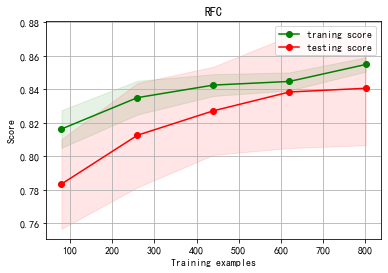

In [107]:
leaderboard_model.fit(X_train,y_train)
g = plot_learning_curve(leaderboard_model, 'RFC', X_train,y_train) #调用定义的 plot_learning_curve 绘制学习曲线

In [125]:
pred1=leaderboard_model.predict(X_test)
pred1 = pd.DataFrame(pred1)
pred1 = pred1.astype(int)
pred1['Survived'] = pred1

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1750 out of 1750 | elapsed:    0.1s finished


In [136]:
test=pd.read_csv('E:/titanic/test.csv')
submission=pd.DataFrame({'PassengerId':test['PassengerId'],
                        'Survived':pred1['Survived']})
submission.to_csv('E:/titanic/ancewer.csv',index=False,sep=',')

pandas.core.series.Series

pandas.core.series.Series

,0,Survived
0,0,0
1,1,1
2,0,0
3,0,0
4,1,1
5,0,0
6,1,1
7,0,0
8,1,1
9,0,0
